# Funciones de Pérdida

### Funciones de Pérdida de Regresión

Vamos a comparar cómo diferentes funciones de pérdida afectan al rendimiento de un modelo `SGDRegressor` entrenado en el conjunto de datos anterior.

Las funciones de pérdida que vamos a analizar son:


1. **L2**:
    - La pérdida cuadrática penaliza los errores grandes mucho más que los pequeños debido al término cuadrático.
    - Fórmula:
    $$
  \mathcal{L}(y, \hat{y}) = || y^{(i)} - \hat{y}^{(i)} ||_2^2 =  \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})^2
    $$

2. **L1**:
    - Comparada con la L2,  penaliza menos los errores grandes (linealmente) y penaliza más los errores pequeños.
    - Fórmula:
    $$
    \mathcal{L}(y, \hat{y}) = || y^{(i)} - \hat{y}^{(i)} ||_1 =  \sum_{i=1}^{m} |y^{(i)} - \hat{y}^{(i)}|
    $$

   
3. **Huber**:
    - Combina la L2 y L1, utilizando L2 para errores pequeños y L1 para errores grandes.
    - Fórmula:
    $$
    \mathcal{L}(y, \hat{y}) =
    \begin{cases}
    \frac{1}{2}(y - \hat{y})^2 & \text{si } |y - \hat{y}| \leq \delta \\
    \delta |y - \hat{y}| - \frac{1}{2}\delta^2 & \text{si } |y - \hat{y}| > \delta
    \end{cases}
    $$

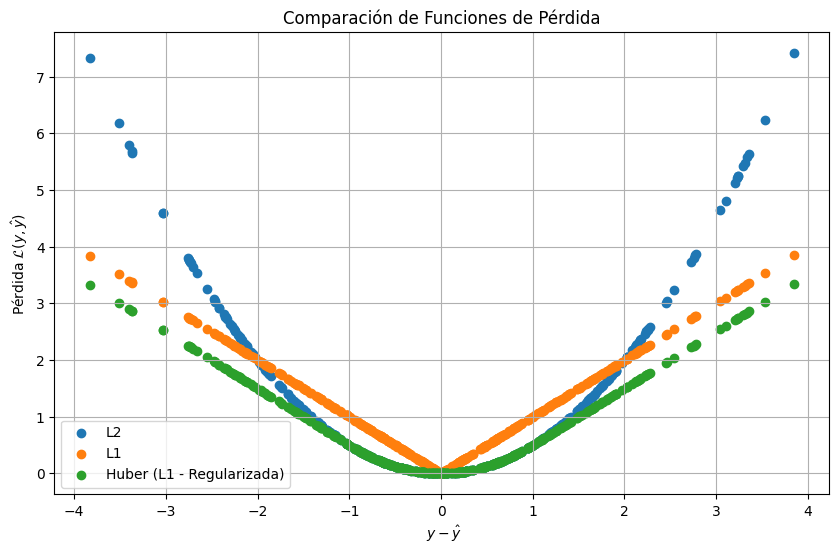

In [ ]:
#################################### COMPLETAR ####################################
# Define la pérdida L2
def l2loss(y_true, y_pred):
    return 0.5 * (y_true - y_pred) ** 2

#################################### COMPLETAR ####################################
# Define la pérdida L1
def l1loss(y_true, y_pred):
    return np.abs(y_true - y_pred)

#################################### COMPLETAR ####################################
# Define la pérdida Uber
def huber_loss(y_true, y_pred, delta=1.0):
    diff = np.abs(y_true - y_pred)
    return np.where(diff <= delta, 0.5 * diff ** 2, delta * diff - 0.5 * delta ** 2)

#################################### COMPLETAR ####################################
# Da valores de ejemplo para y_true y y_pred
y_true = np.random.randn(400)
y_pred = np.random.randn(400)
#################################### COMPLETAR ####################################
# Calcula las pérdidas para cada función
l2loss_v = l2loss(y_true, y_pred)
l1loss_v = l1loss(y_true, y_pred)
huber_loss_v = huber_loss(y_true, y_pred)

#################################### COMPLETAR ####################################
# Visualiza los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_true - y_pred, l2loss_v, label='L2')
plt.scatter(y_true - y_pred, l1loss_v, label='L1')
plt.scatter(y_true - y_pred, huber_loss_v, label='Huber (L1 - Regularizada)')

# Configuración del gráfico
plt.xlabel(" $y - \hat{y}$")
plt.ylabel("Pérdida $\mathcal{L}(y, \hat{y})$")
plt.title("Comparación de Funciones de Pérdida")
plt.legend()
plt.grid(True)
plt.show()

### Funciones de Pérdida de Clasificación

1. **Pérdida Logística**:
   - Utilizada en problemas de clasificación probabilística. Penaliza más las predicciones erróneas confiadas.
   - Fórmula:
   $$
   \mathcal{L}(y, \hat{y}) = y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})
   $$

2. **Hinge**:
   - Utilizada en SVM, penaliza predicciones incorrectas dentro del margen.
   - Fórmula:
   $$
   \mathcal{L}(y, \hat{y})=  \max(0, 1 - y \cdot \hat{y})
   $$

3. **Perceptron Loss**:
   - Penaliza predicciones incorrectas sin margen.
   - Fórmula:
   $$
   \mathcal{L}(y, \hat{y})=  \max(0, -y \cdot \hat{y})
   $$

4. **Binomial**:
   - Similar a la logística. Penaliza las predicciones basadas en la desviación binomial entre las probabilidades reales y predichas.
   - Fórmula:
   $$
   \mathcal{L}(y, \hat{y}) = \log\left(1 + \exp(-y \cdot \hat{y})\right)
   $$

6. **Pérdida Exponencial**:
   - Penaliza fuertemente los errores grandes.
   - Fórmula:
   $$
   \mathcal{L}(y, \hat{y}) =\exp(-y \cdot \hat{y})
   $$

/tmp/ipykernel_1161478/2960432786.py:4: RuntimeWarning: invalid value encountered in log
  return -y_true*np.log(y_pred) - (1 -y_true)*np.log(1-y_pred)


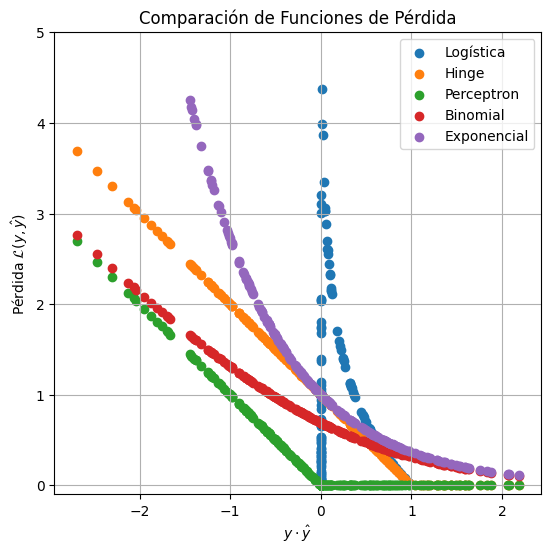

In [ ]:
#################################### COMPLETAR ####################################
# Define la pérdida Logística
def logloss(y_true, y_pred):
    return -y_true*np.log(y_pred) - (1 -y_true)*np.log(1-y_pred)

#################################### COMPLETAR ####################################
# Define la pérdida Hinge
def hingeloss(y_true, y_pred):
    return np.maximum(0, 1 - y_true * y_pred)

#################################### COMPLETAR ####################################
# Define la pérdida Perceptrón
def perceptronloss(y_true, y_pred):
    return np.maximum(0, - y_true * y_pred)

#################################### COMPLETAR ####################################
# Define la pérdida Binomial
def binomialloss(y_true, y_pred):
    return np.log(1 + np.exp(-y_true * y_pred))

#################################### COMPLETAR ####################################
# Define la pérdida Exponencial
def exploss(y_true, y_pred):
    return np.exp(-y_true * y_pred)

#################################### COMPLETAR ####################################
# Da valores de ejemplo para y_true y y_pred
y_true = np.random.randint(0,2,400)
y_pred = np.random.randn(400)  # Predicciones variadas entre -3 y 3

#################################### COMPLETAR ####################################
# Calcula las pérdidas para cada función
logloss_v = logloss(y_true, y_pred)
hingeloss_v = hingeloss(y_true, y_pred)
perceptronloss_v = perceptronloss(y_true, y_pred)
binomialloss_v = binomialloss(y_true, y_pred)
exploss_v = exploss(y_true, y_pred)

#################################### COMPLETAR ####################################
# Visualiza los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_true*y_pred, logloss_v, label='Logística')
plt.scatter(y_true*y_pred, hingeloss_v, label='Hinge')
plt.scatter(y_true*y_pred, perceptronloss_v, label='Perceptron')
plt.scatter(y_true*y_pred, binomialloss_v, label='Binomial')
plt.scatter(y_true*y_pred, exploss_v, label='Exponencial')

# Configuración del gráfico
plt.xlabel("$y \cdot\hat{y}$")
plt.ylabel("Pérdida $\mathcal{L}(y, \hat{y})$")
plt.title("Comparación de Funciones de Pérdida")
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal')
plt.ylim([-0.1,5])
plt.show()

### Comparación de Funciones de Pérdida en `SGDRegressor`

Vamos a comparar cómo diferentes funciones de pérdida afectan al rendimiento de un modelo `SGDRegressor` entrenado en el conjunto de datos anterior.


Comenzamos generando datos. Crea unos datos ruidosos a partir de la siguiente función:
$$
y = 2x +1 \eta, \quad \eta \sim \mathcal{N}(0,1),
$$
y, además, añade algunos *outliers* al conjunto de puntos generado.

(50,)


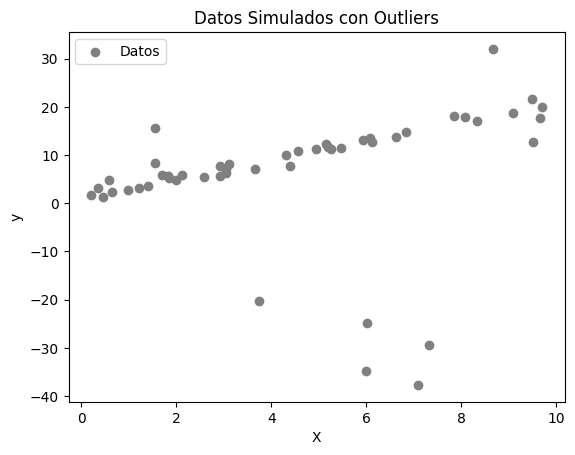

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#################################### COMPLETAR ####################################
# Generar datos
np.random.seed(42)
X = 10*np.random.rand(50)
y = 2 * X + 1 + np.random.normal(0, 1, X.shape)
print(y.shape)

#################################### COMPLETAR ####################################
# Introducir algunos outliers
n_outliers = 10
y[:n_outliers] += 20 * (0.5*X[0:n_outliers] - X[0:n_outliers]*np.random.rand(n_outliers))

#################################### COMPLETAR ####################################
# Visualizar
plt.scatter(X, y, color='gray', label='Datos')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Datos Simulados con Outliers")
plt.legend()
plt.show()

Ahora, importa `SGRegressor` y ajusta los datos anteriores utilizando distintas funciones de pérdida predeterminadas.

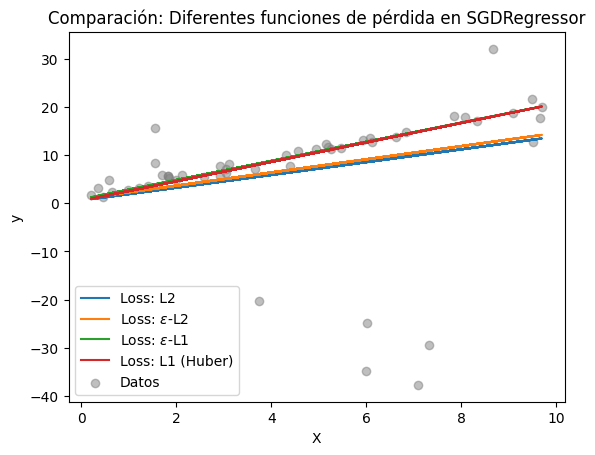

In [ ]:
#################################### COMPLETAR ####################################
# Importa SGDRegressor
from sklearn.linear_model import SGDRegressor

#################################### COMPLETAR ####################################
# Entrena varios modelos con distintas funciones

# Lista de funciones de pérdida para probar
loss_functions = ['squared_error', 'squared_epsilon_insensitive', 'epsilon_insensitive', 'huber']
loss_dict = {'squared_error': 'L2', 'squared_epsilon_insensitive': '$\epsilon$-L2', 'huber':'L1 (Huber)', 'epsilon_insensitive': '$\epsilon$-L1'}

X = X.reshape(-1, 1) # Añadimos una dimensión al final

# Entrenamos un modelo con cada función de pérdida y visualizamos los resultados
for loss in loss_functions:
    model = SGDRegressor(loss=loss, max_iter=10000, tol=1e-4, penalty=None)
    model.fit(X, y)
    y_pred = model.predict(X)

    # Graficar el resultado
    plt.plot(X, y_pred, label=f'Loss: {loss_dict[loss]}')

plt.scatter(X, y, label='Datos', color='gray', alpha=0.5)
# Configuración del gráfico
plt.xlabel("X")
plt.ylabel("y")
plt.title("Comparación: Diferentes funciones de pérdida en SGDRegressor")
plt.legend()
plt.show()

<div style="background-color: lightblue; padding: 10px; border-radius: 5px; font-style: italic;">
  ¿Qué puedes concluir de los modelos resultantes?
</div>